In [5]:
%matplotlib inline
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model,Sequential
import pandas as pd
import numpy as np

In [2]:
filepath = "C:/Users/Bin/Documents/dataset1010/dataset/dataset1010"
data = pd.read_csv(filepath,header=None)
data=data.drop(0,axis=1)
data=data.drop(10,axis=1)

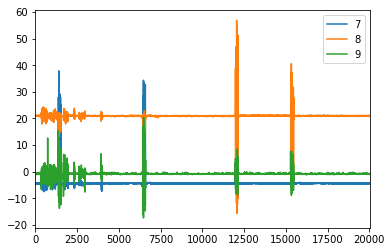

In [6]:
data.iloc[:,6:].plot()

In [7]:
timesteps = 30
input_dim = data.shape[1]
latent_dim = 3
n_epoch = 30
n_batch = 10

In [8]:
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
sequence_autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

x_train = data.iloc[:15000,:]
X = pd.DataFrame.as_matrix(x_train)
X = np.reshape(X,(500,30,input_dim)) #reshape(samples,timesteps,dim)
sequence_autoencoder.fit(X,X,
                epochs=100,
                batch_size=50,
                shuffle=True)

Epoch 1/100
500/500 [==============================] - 1s 3ms/step - loss: 66.9985
Epoch 2/100
500/500 [==============================] - 0s 438us/step - loss: 66.7954
Epoch 3/100
500/500 [==============================] - 0s 469us/step - loss: 66.4386
Epoch 4/100
500/500 [==============================] - 0s 563us/step - loss: 65.8974
Epoch 5/100
500/500 [==============================] - 0s 563us/step - loss: 65.3522
Epoch 6/100
500/500 [==============================] - 0s 406us/step - loss: 64.7678
Epoch 7/100
500/500 [==============================] - 0s 438us/step - loss: 64.1156
Epoch 8/100
500/500 [==============================] - 0s 438us/step - loss: 63.3912
Epoch 9/100
500/500 [==============================] - 0s 406us/step - loss: 62.7418
Epoch 10/100
500/500 [==============================] - 0s 412us/step - loss: 62.1543
Epoch 11/100
500/500 [==============================] - 0s 406us/step - loss: 61.8160
Epoch 12/100
500/500 [==============================] - 0s 625us/

500/500 [==============================] - 0s 406us/step - loss: 60.2748
Epoch 97/100
500/500 [==============================] - 0s 406us/step - loss: 60.2732
Epoch 98/100
500/500 [==============================] - 0s 406us/step - loss: 60.2713
Epoch 99/100
500/500 [==============================] - 0s 375us/step - loss: 60.2697
Epoch 100/100
500/500 [==============================] - 0s 406us/step - loss: 60.2676


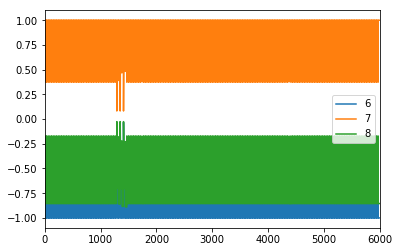

In [10]:
test = pd.DataFrame.as_matrix(data.iloc[14000:20000,:])
test = np.reshape(test,(200,30,input_dim))
foo = encoder.predict(test)
bar = sequence_autoencoder.predict(test)
bar_r = np.reshape(bar,(6000,input_dim))
y = pd.DataFrame(bar_r)
y.iloc[:,6:].plot()

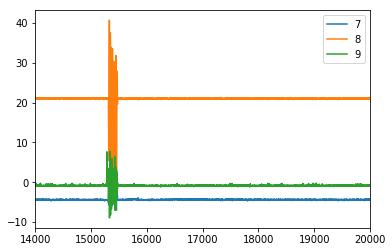

In [11]:
data.iloc[14000:20000,6:].plot()
